In [27]:
import numpy as pd
import pandas as pd
from matplotlib import pyplot as plt
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
digit = pd.read_csv('./data/digit_train.csv')

In [3]:
# 데이터 확인
# 주의점 : 데이터가 너무 크다. 그대로 불러오면 메모리가 버티지 못한다.
# head()함수를 이용해서 데이터의 형태를 알아보자
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit.shape

(42000, 785)

## EDA

In [5]:
img0 = digit.iloc[0, 1:]

In [7]:
print(max(img0))
print(min(img0))

255
0


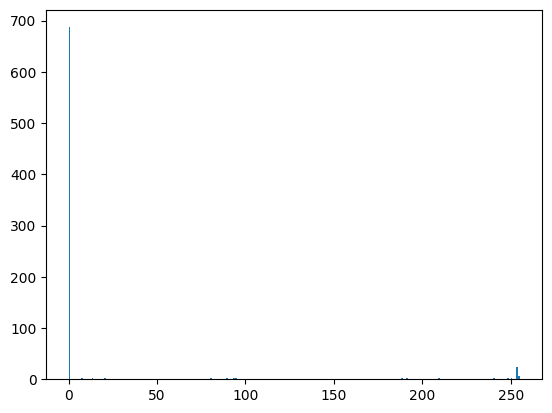

In [8]:
plt.hist(img0, bins=255)
plt.show()

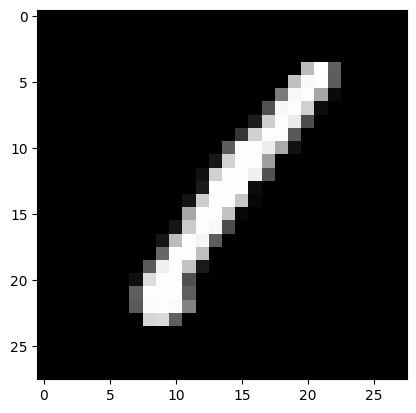

In [10]:
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

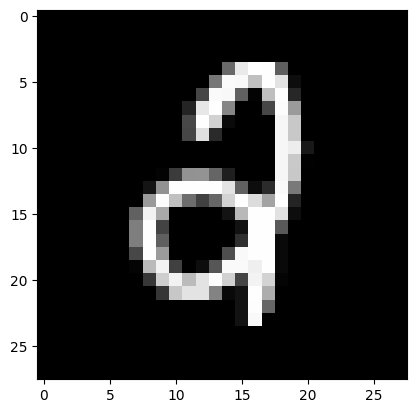

In [13]:
img0 = digit.iloc[10000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

In [15]:
X = digit.iloc[ 0 : 5000, 1: ]
y = digit.iloc[ 0 : 5000, 0 ]
print(X.shape)
print(y.shape)


(5000, 784)
(5000,)


In [18]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 784), (1500, 784), (3500,), (1500,))

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logi = LogisticRegression()

In [22]:
logi.fit(x_train, y_train)

C:\Users\user21\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred = logi.predict(x_test)

In [24]:
logi.score(x_test, y_test)

0.8773333333333333

In [25]:
logi.score(x_train, y_train)

1.0

In [29]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(logi, x_train, y_train)
print(result.mean())

0.8797142857142857


### 데이터 스케일링
